# The Validation Set Approach

In this lab we explore the use of the validation set approach in order to estimate the test error rates that result from fitting various linear models on the Auto data set.

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

%matplotlib inline

auto = pd.read_csv('Auto.csv', na_values='?').dropna()

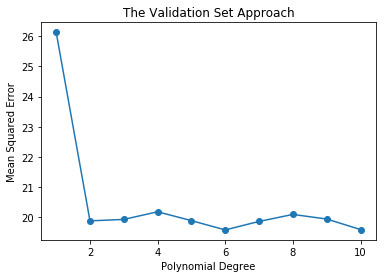

In [82]:
train, test = train_test_split(Auto,train_size=0.50,random_state=14)

# Make a list for storing cross validation scores (mean squared errors)
scores = list()

# Make a list of polynomial orders (from 1 to 10)
degrees = np.arange(1,11)

# Iterate through the different polynomial orders
for i in range(len(degrees)):
    
    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)

    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(train.horsepower.values.reshape(-1,1), train.mpg.values.reshape(-1,1))
       
    predictions = pipeline.predict(test.horsepower.values.reshape(-1,1))
    
    # Calculate the mean squared error via cross validation (using the LeaveOneOut() object)
    score = mean_squared_error(test.mpg, predictions)
    scores.append(score)
    
    
    

# Plot the MSE vs. polynomial degree
plt.plot(degrees,scores,'-o')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.savefig('validationSet.png', dpi=200)
plt.title('The Validation Set Approach')